In [484]:
#dependencies
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import pandas as pd
import numpy as np
import numpy
import requests
import os
import io
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import math
import plotly_express as ex
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib.patches as mpatches

In [413]:
#import the csvs 

#2019
spotify_data_2019_csv = pd.read_csv('Yearly_Spotify2019_Updated_2-13-21.csv')

#2020 csv
spotify_data_2020_csv = pd.read_csv('Yearly_Spotify2020_Updated_2-13-21.csv', encoding = 'ISO-8859-1')

#2021 csv
spotify_data_2021_csv = pd.read_csv('spotify_Top200_2021_byMonth.csv', encoding = 'ISO-8859-1')

#combined csvs
all_spotify_data_2021_csv = pd.read_csv('spotify_charts_all_20192020.csv', encoding = 'ISO-8859-1')




In [586]:
#csv to dataframe

#2019 CSV to DF
sd_2019_df = pd.DataFrame(spotify_data_2019_csv)

#2020 CSV to DF
sd_2020_df = pd.DataFrame(spotify_data_2020_csv)

#2021 CSV to DF
sd_2021_df = pd.DataFrame(spotify_data_2021_csv)

#Combined CSVs
sd_combined_df = pd.DataFrame(all_spotify_data_2021_csv)



In [638]:
#stream by year
sd_2020_df.groupby("Year")["Streams"].sum()
sum_2020 = sd_2020_df.groupby("Year")["Streams"].sum()
sum_2020

sd_2019_df.groupby("Year")["Streams"].sum()
sum_2019 = sd_2019_df.groupby("Year")["Streams"].sum()
#sum_2019
sum_2020

Year
2020    28565564341
Name: Streams, dtype: int64

In [447]:
stream_delta = (sum_2020 - sum_2019)

#percent_stream_delta = (stream_delta/sum_2019) *100
#percent_stream_delta



Year
2019   NaN
2020   NaN
Name: Streams, dtype: float64


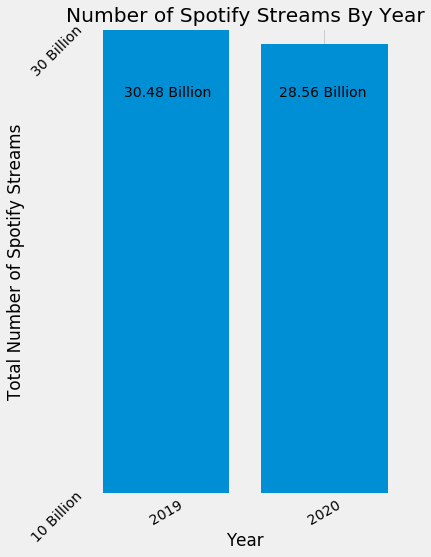

In [650]:
fig, ax1 = plt.subplots(1,1)

fig.text(.30,.76, "30.48 Billion", ha = "center");
fig.text(.73,.76, "28.56 Billion", ha = "center");

x1 = [0,1,2,3]
label_number = ['10 Billion','30 Billion']

ax1.set_yticks(x1)
ax1.set_yticklabels(label_number, minor=False, rotation=45)


#------------------------------------------------------------
#style
plt.style.use("fivethirtyeight")

#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#x axis
x_axis = sd_combined_df["Year"].unique()

plt.title("Number of Spotify Streams By Year")

plt.xlabel("Year")

#y axis
y_axis = sum_by_year_df

plt.ylabel("Total Number of Spotify Streams")

fig, ax = plt.bar(x_axis, y_axis)

#plt.tight_layout()

#ticks and rotation
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = "30")

rcParams["figure.figsize"]= 5, 7

plt.ylim(1000000000,30000000000)
plt.yticks([1000000000,30000000000])




#show bar plot
plt.show()


In [591]:
#streams by month 2019 vs 2020
#new_sd_2019_df = sd_2019_df.groupby("Month")["Streams"].sum()
#new_sd_2019_df

#new_sd_2019_df = pd.DataFrame(sd_2019_df)
new_sd_2019_df = sd_2019_df.groupby("Month")["Streams"].sum()

new_sd_2019_df.index = pd.CategoricalIndex(new_sd_2019_df.index, categories=['Previous December','January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], ordered=True)
new_sd_2019_df = new_sd_2019_df.sort_index()
new_sd_2019_df

#sd_2020_df.index = pd.CategoricalIndex(sd_2020_df.index, categories=['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], ordered=True)
#sd_2020_df = sd_2020_df.sort_index()
#sd_2020_df




new_sd_2020_df = sd_2020_df.groupby("Month")["Streams"].sum()
new_sd_2020_df = new_sd_2020_df

#sort months by categorical index
new_sd_2020_df.index = pd.CategoricalIndex(new_sd_2020_df.index, categories=['Previous December','January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], ordered=True)
new_sd_2020_df = new_sd_2020_df.sort_index()
new_sd_2020_df



#df.sort_values(by='Date_col', inplace=True)

Month
January      3091211710
February     2404919241
March        2383660139
April        2575849522
May          2148673248
June         1971654437
July         2894610567
August       2119429485
September    2016420436
October      2475651287
November     1989204641
December     2494279628
Name: Streams, dtype: int64

In [592]:
new_sd_2019_df

Month
January      2940841518
February     2596043535
March        2372715263
April        2388448882
May          2820403413
June         2195570985
July         2772450893
August       2596043535
September    2364928332
October      2803657786
November     2133620980
December     2496908800
Name: Streams, dtype: int64

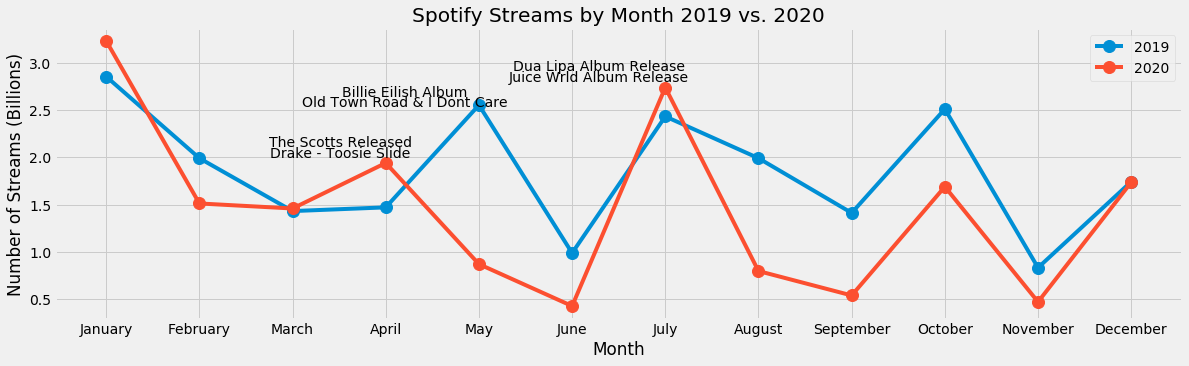

In [629]:
#line plot 2019 vs 2020 by month, 

#need to reformat the number of streams y axis and need to reorder the months by order
#size of plot, import new cleaned dataframe

 

fig, ax = plt.subplots()
#April Text
fig.text(.3,.52, "Drake - Toosie Slide", ha = "center");
fig.text(.3,.55, "The Scotts Released", ha = "center");

#may 2019 text
fig.text(.35,.69, "Billie Eilish Album", ha = "center");
fig.text(.35,.66, "Old Town Road & I Dont Care", ha = "center");

#June Text
fig.text(.5,.76, "Dua Lipa Album Release", ha = "center");
fig.text(.5,.73, "Juice Wrld Album Release", ha = "center");



plt.style.use("fivethirtyeight")
plt.plot(new_sd_2019_df, markersize=12, marker="o")

plt.plot(new_sd_2020_df, markersize=12, marker="o")
plt.legend([2019, 2020])



stream_label = np.arange(0, 4, .5)
ax.set_yticklabels(stream_label)


rcParams["figure.figsize"]= 18, 5
#title and axis labels
plt.title("Spotify Streams by Month 2019 vs. 2020")
plt.xlabel("Month")
plt.ylabel("Number of Streams (Billions)");

plt.show()


#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)





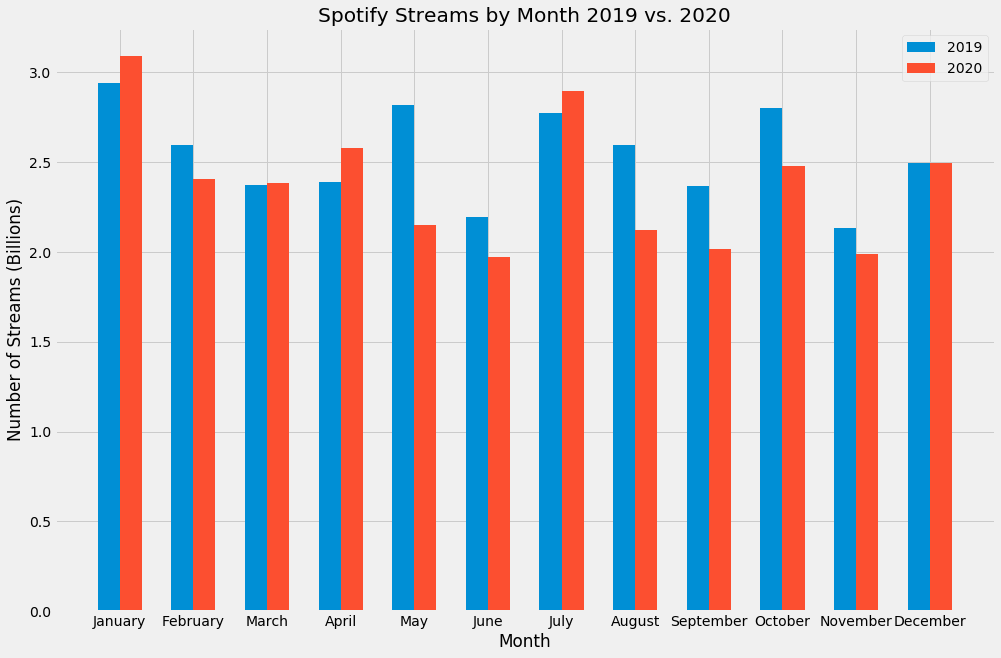

In [585]:
month_list = ['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December']

#new_sd_2019_df = pd.DataFrame(sd_2019_df)
new_sd_2019_df = sd_2019_df.groupby("Month")["Streams"].sum()

#sort 2019 by monyh
new_sd_2019_df.index = pd.CategoricalIndex(new_sd_2019_df.index, categories=['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], ordered=True)
new_sd_2019_df = new_sd_2019_df.sort_index()
new_sd_2019_df

#make 2020 df
new_sd_2020_df = sd_2020_df.groupby("Month")["Streams"].sum()
new_sd_2020_df = new_sd_2020_df

#sort months by categorical index
new_sd_2020_df.index = pd.CategoricalIndex(new_sd_2020_df.index, categories=['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], ordered=True)
new_sd_2020_df = new_sd_2020_df.sort_index()
new_sd_2020_df


#-------------------

indx = np.arange(len(month_list))
stream_label = np.arange(0, 4, .5)
streams_2019 = new_sd_2019_df
streams_2020 = new_sd_2020_df

bar_width = 0.30

fig, ax = plt.subplots()
bar2019 = ax.bar(indx - bar_width/2, streams_2019, bar_width, label = '2019')
bar2020 = ax.bar(indx + bar_width/2, streams_2020, bar_width, label = '2020')

#plt.plot(streams_2019, markersize=12, marker="o")

#plt.plot(streams_2020, markersize=12, marker="o")

#x axis label
ax.set_xticks(indx)
ax.set_xticklabels(month_list)

#y axis label

#ax.set_yticks(stream_label)
ax.set_yticklabels(stream_label)

#legend
ax.legend()

#title and axis labels
plt.title("Spotify Streams by Month 2019 vs. 2020")
plt.xlabel("Month")
plt.ylabel("Number of Streams (Billions)");

#ax.plot(streams_2019, streams_2020)

plt.show()







